In [1]:
from sandbox_assets import *
from qiskit.providers.fake_provider import FakeProvider
from qiskit.providers.models import BackendProperties

import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations 

First we look at the available fake backends and filter them by two criteria:

1. They must have the basis gates: $\text{CX, RZ, ID, SX, X}$.
2. They must have at least 11 qubits.

In [2]:
compatible_backends = []

basis_gates = ['id', 'rz', 'sx', 'x', 'cx']

outliers = ['fake_manhattan']

for backend in FakeProvider().backends():
    config = backend.configuration()
    if (all(gate in config.basis_gates for gate in basis_gates) and config.n_qubits >= 11):
        if config.backend_name not in outliers:
            compatible_backends.append(backend)

In [3]:
compatible_backends

[<FakeBrooklyn('fake_brooklyn')>,
 <FakeCairo('fake_cairo')>,
 <FakeGuadalupe('fake_guadalupe')>,
 <FakeHanoi('fake_hanoi')>,
 <FakeKolkata('fake_kolkata')>,
 <FakeMontreal('fake_montreal')>,
 <FakeMumbai('fake_mumbai')>,
 <FakeParis('fake_paris')>,
 <FakeSydney('fake_sydney')>,
 <FakeToronto('fake_toronto')>,
 <FakeWashington('fake_washington')>]

In [4]:
def graph_gate_time(backends, gate, qubits):

    fig, ax = plt.subplots(layout = 'constrained')

    for backend in backends:

        gate_times = []
        corrected_qubits = []

        props = backend.properties()
        
        for qubit in qubits:
            
            try:
                gate_times.append(props.gate_length(gate, qubit))
                corrected_qubits.append(qubit)
            except:
                pass

        ax.scatter([str(i) for i in corrected_qubits], np.array(gate_times)*1e9, marker = "o", label = '{}'.format(backend))

        print('The average gate time of the {} gate for {} is {} ns.'.format(gate, backend, np.average(np.array(gate_times))))
        print(corrected_qubits)

    ax.legend()
    ax.set(
    title = '{} gate times'.format(gate),
    xlabel = 'qubit',
    ylabel = 'gate time (ns)',
    )
    ax.tick_params('x', labelrotation=70)
    plt.show()



In [5]:
qubits = [*range(0,11)]

## 1 qubit gates

The average gate time of the id gate for fake_brooklyn is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the id gate for fake_cairo is 2.1333333333333336e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the id gate for fake_guadalupe is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the id gate for fake_hanoi is 2.1333333333333336e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the id gate for fake_kolkata is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the id gate for fake_montreal is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the id gate for fake_mumbai is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the id gate for fake_paris is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the id gate for fake_sydney is 3

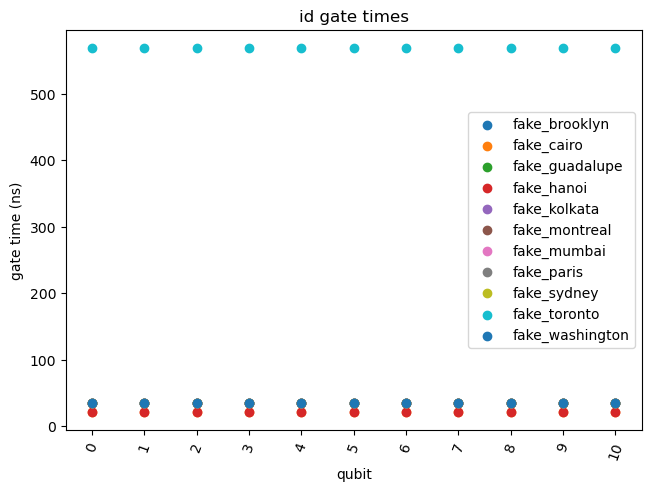

In [6]:
graph_gate_time(compatible_backends, 'id', qubits)

The average gate time of the sx gate for fake_brooklyn is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the sx gate for fake_cairo is 2.1333333333333336e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the sx gate for fake_guadalupe is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the sx gate for fake_hanoi is 2.1333333333333336e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the sx gate for fake_kolkata is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the sx gate for fake_montreal is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the sx gate for fake_mumbai is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the sx gate for fake_paris is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the sx gate for fake_sydney is 3

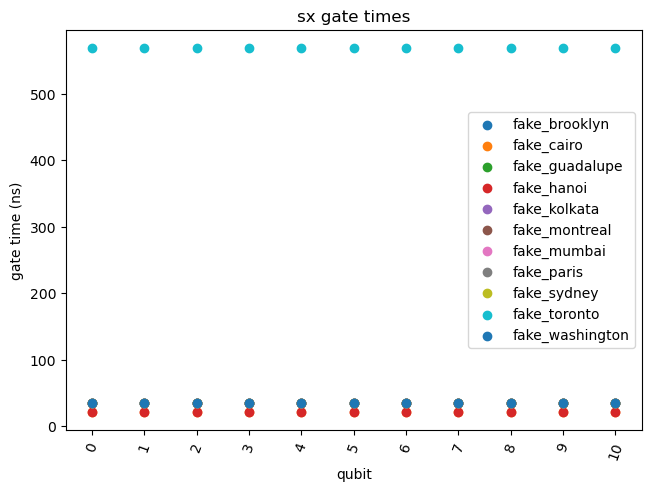

In [7]:
graph_gate_time(compatible_backends, 'sx', qubits)

The average gate time of the x gate for fake_brooklyn is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the x gate for fake_cairo is 2.1333333333333336e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the x gate for fake_guadalupe is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the x gate for fake_hanoi is 2.1333333333333336e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the x gate for fake_kolkata is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the x gate for fake_montreal is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the x gate for fake_mumbai is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the x gate for fake_paris is 3.555555555555556e-08 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the x gate for fake_sydney is 3.55555555

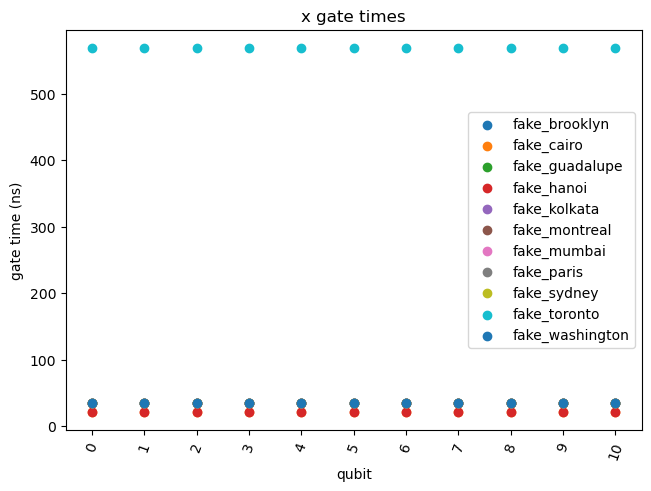

In [8]:
graph_gate_time(compatible_backends, 'x', qubits)

The average gate time of the rz gate for fake_brooklyn is 0.0 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the rz gate for fake_cairo is 0.0 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the rz gate for fake_guadalupe is 0.0 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the rz gate for fake_hanoi is 0.0 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the rz gate for fake_kolkata is 0.0 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the rz gate for fake_montreal is 0.0 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the rz gate for fake_mumbai is 0.0 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the rz gate for fake_paris is 0.0 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the rz gate for fake_sydney is 0.0 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The average gate time of the rz gate for fake_toronto is 0.0 ns.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The 

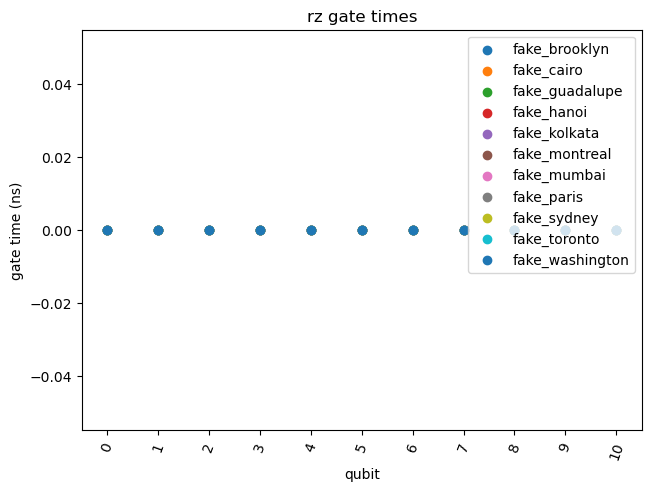

In [9]:
graph_gate_time(compatible_backends, 'rz', qubits)

## 2 qubit gate(s)

In [10]:
qubits2 = list(permutations(qubits, 2))

The average gate time of the cx gate for fake_brooklyn is 3.754666666666666e-07 ns.
[(0, 1), (0, 10), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5), (6, 7), (7, 6), (7, 8), (8, 7), (8, 9), (9, 8), (10, 0)]
The average gate time of the cx gate for fake_cairo is 3.239111111111111e-07 ns.
[(0, 1), (1, 0), (1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (3, 5), (4, 1), (4, 7), (5, 3), (5, 8), (6, 7), (7, 4), (7, 6), (7, 10), (8, 5), (8, 9), (9, 8), (10, 7)]
The average gate time of the cx gate for fake_guadalupe is 4.0675555555555556e-07 ns.
[(0, 1), (1, 0), (1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (3, 5), (4, 1), (4, 7), (5, 3), (5, 8), (6, 7), (7, 4), (7, 6), (7, 10), (8, 5), (8, 9), (9, 8), (10, 7)]
The average gate time of the cx gate for fake_hanoi is 2.951111111111111e-07 ns.
[(0, 1), (1, 0), (1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (3, 5), (4, 1), (4, 7), (5, 3), (5, 8), (6, 7), (7, 4), (7, 6), (7, 10), (8, 5), (8, 9), (9, 8), (10, 7)]
The average gate

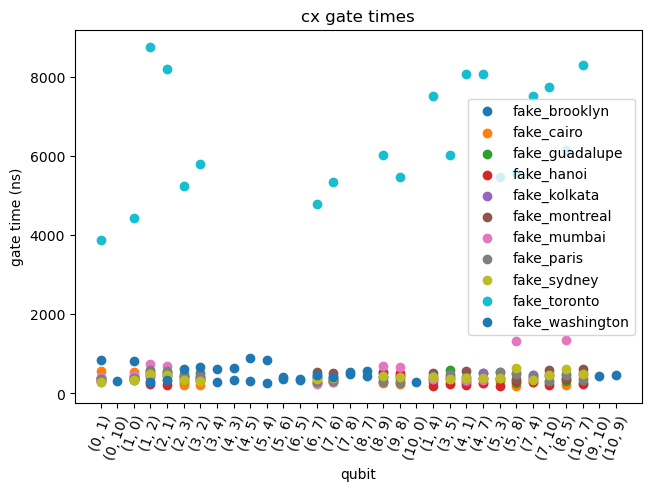

In [11]:
graph_gate_time(compatible_backends, 'cx', qubits2)

It might be beneficial to handle fake_toronto as an outlier!

In [12]:
compatible_backends = []

basis_gates = ['id', 'rz', 'sx', 'x', 'cx']

outliers = ['fake_manhattan', 'fake_toronto']

for backend in FakeProvider().backends():
    config = backend.configuration()
    if (all(gate in config.basis_gates for gate in basis_gates) and config.n_qubits >= 11):
        if config.backend_name not in outliers:
            compatible_backends.append(backend)

In [13]:
compatible_backends

[<FakeBrooklyn('fake_brooklyn')>,
 <FakeCairo('fake_cairo')>,
 <FakeGuadalupe('fake_guadalupe')>,
 <FakeHanoi('fake_hanoi')>,
 <FakeKolkata('fake_kolkata')>,
 <FakeMontreal('fake_montreal')>,
 <FakeMumbai('fake_mumbai')>,
 <FakeParis('fake_paris')>,
 <FakeSydney('fake_sydney')>,
 <FakeWashington('fake_washington')>]

The average gate time of the cx gate for fake_brooklyn is 3.754666666666666e-07 ns.
[(0, 1), (0, 10), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5), (6, 7), (7, 6), (7, 8), (8, 7), (8, 9), (9, 8), (10, 0)]
The average gate time of the cx gate for fake_cairo is 3.239111111111111e-07 ns.
[(0, 1), (1, 0), (1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (3, 5), (4, 1), (4, 7), (5, 3), (5, 8), (6, 7), (7, 4), (7, 6), (7, 10), (8, 5), (8, 9), (9, 8), (10, 7)]
The average gate time of the cx gate for fake_guadalupe is 4.0675555555555556e-07 ns.
[(0, 1), (1, 0), (1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (3, 5), (4, 1), (4, 7), (5, 3), (5, 8), (6, 7), (7, 4), (7, 6), (7, 10), (8, 5), (8, 9), (9, 8), (10, 7)]
The average gate time of the cx gate for fake_hanoi is 2.951111111111111e-07 ns.
[(0, 1), (1, 0), (1, 2), (1, 4), (2, 1), (2, 3), (3, 2), (3, 5), (4, 1), (4, 7), (5, 3), (5, 8), (6, 7), (7, 4), (7, 6), (7, 10), (8, 5), (8, 9), (9, 8), (10, 7)]
The average gate

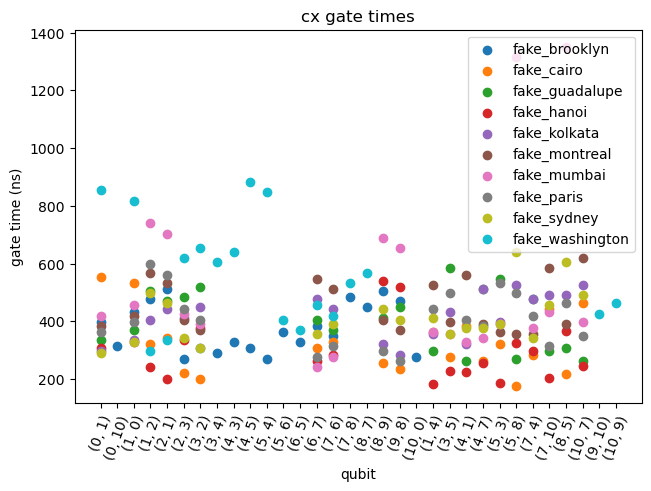

In [14]:
graph_gate_time(compatible_backends, 'cx', qubits2)

Then the overall average:

In [15]:
def gate_avg(backends, gate, qubits):
    
    backend_avgs = []

    for backend in backends:

        gate_times = []

        props = backend.properties()
        
        for qubit in qubits:
            try:
                gate_times.append(props.gate_length(gate, qubit))
            except:
                pass

        backend_avgs.append(np.average(np.array(gate_times)))
    
    print('The overall average gate_time for the gate {} is {} ns.'.format(gate, np.average(np.array(backend_avgs))))

In [16]:
gate_avg(compatible_backends, 'id', qubits)

The overall average gate_time for the gate id is 3.271111111111112e-08 ns.


In [17]:
gate_avg(compatible_backends, 'sx', qubits)

The overall average gate_time for the gate sx is 3.271111111111112e-08 ns.


In [18]:
gate_avg(compatible_backends, 'x', qubits)

The overall average gate_time for the gate x is 3.271111111111112e-08 ns.


In [19]:
gate_avg(compatible_backends, 'rz', qubits)

The overall average gate_time for the gate rz is 0.0 ns.


In [20]:
gate_avg(compatible_backends, 'cx', qubits2)

The overall average gate_time for the gate cx is 4.1967012345679007e-07 ns.
